# Misc dataset

In [1]:
from model.graph_mcmc import Graph_MCMC

In [2]:
graph = Graph_MCMC()
graph.read_from_ns("sp_primary_school/day_1") # escorts could be fun

In [3]:
graph.remove_property("viz")
graph.remove_property("label")

True

In [4]:
graph.G.vertex_properties

{'classname': <VertexPropertyMap object with value type 'string', for Graph 0x7fcffaa15970, at 0x7fcffaa31580>, 'gender': <VertexPropertyMap object with value type 'string', for Graph 0x7fcffaa15970, at 0x7fcffaa31640>}

In [5]:
graph.G.vertex_properties["classname"][125]

'3B'

In [6]:
graph.convert_props_to_flags()

In [7]:
graph.print_info()

Graph with N=236 nodes, E=5899 edges and D=14 vertex features for training


In [8]:
graph.G.edge_properties

{'_graphml_edge_id': <EdgePropertyMap object with value type 'string', for Graph 0x7fcffaa15970, at 0x7fcffaa31910>, 'count': <EdgePropertyMap object with value type 'int16_t', for Graph 0x7fcffaa15970, at 0x7fcffaa319d0>, 'duration': <EdgePropertyMap object with value type 'int16_t', for Graph 0x7fcffaa15970, at 0x7fcffaa31a30>, 'id': <EdgePropertyMap object with value type 'int16_t', for Graph 0x7fcffaa15970, at 0x7fcffaa31850>}

In [9]:
graph.G.vertex_properties

{'F': <VertexPropertyMap object with value type 'bool', for Graph 0x7fcffaa15970, at 0x7fd06883a0a0>, 'M': <VertexPropertyMap object with value type 'bool', for Graph 0x7fcffaa15970, at 0x7fd06882c430>, 'Unknown': <VertexPropertyMap object with value type 'bool', for Graph 0x7fcffaa15970, at 0x7fcffaa153a0>, '1A': <VertexPropertyMap object with value type 'bool', for Graph 0x7fcffaa15970, at 0x7fcffaa152e0>, '1B': <VertexPropertyMap object with value type 'bool', for Graph 0x7fcffaa15970, at 0x7fcffaa15130>, '2A': <VertexPropertyMap object with value type 'bool', for Graph 0x7fcffaa15970, at 0x7fcffaa31820>, '2B': <VertexPropertyMap object with value type 'bool', for Graph 0x7fcffaa15970, at 0x7fcffaa31f10>, '3A': <VertexPropertyMap object with value type 'bool', for Graph 0x7fcffaa15970, at 0x7fcffaa31fa0>, '3B': <VertexPropertyMap object with value type 'bool', for Graph 0x7fcffaa15970, at 0x7fcffaa315b0>, '4A': <VertexPropertyMap object with value type 'bool', for Graph 0x7fcffaa159

In [10]:
graph.partition(B_min=10, B_max=10)

Performing inference...
Current bracket: (10, 10, 10) (11801.42893839824, 11801.42893839824, 11801.42893839824)
Current bracket: (10, 10, 10) (11801.42893839824, 11801.42893839824, 11801.42893839824)
Bisect at B = 10 with S = 11801.42893839824
Best result: B = 10, S = 11801.42893839824
Done


<VertexPropertyMap object with value type 'int32_t', for Graph 0x7fcffaa15970, at 0x7fcffa9f13d0>

In [ ]:
graph.draw(gen_layout=False)

In [11]:
graph.mcmc(num_iter=1000)

100%|██████████| 1000/1000 [00:01<00:00, 699.55it/s]


10

Drawing soft partition


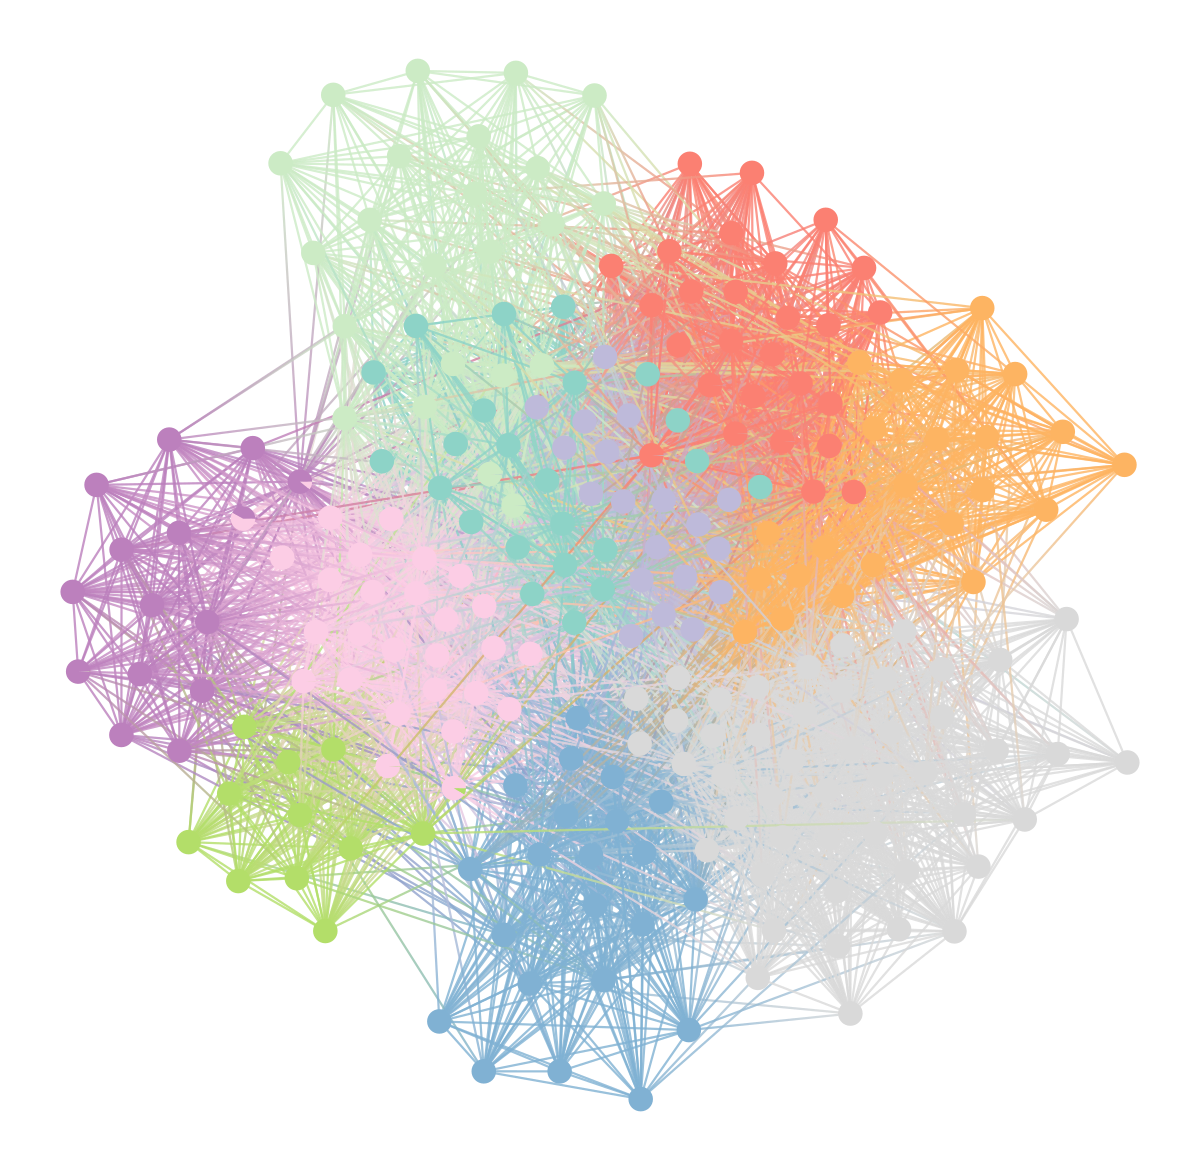

In [12]:
graph.draw()

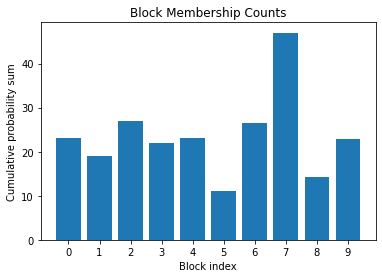

In [13]:
graph.plot_posterior_props()

## Train classifier

In [14]:
classifier = graph.sample_classifier_mala(10000, step_scaling=0.1, verbose=True)

100%|██████████| 10000/10000 [00:10<00:00, 966.44it/s]Sample accept ratio: 84.23%
Train. set accuracy: 77.54237288135593%



## Interpret results

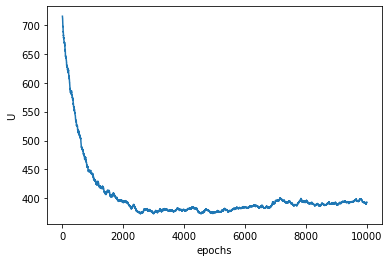

In [15]:
classifier.plot_U()

In [16]:
classifier.thin_samples()

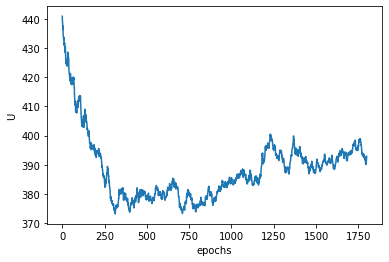

In [17]:
classifier.plot_U()

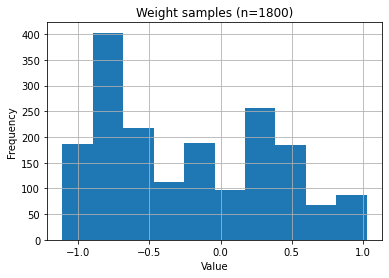

In [18]:
classifier.plot_sample_histogram()

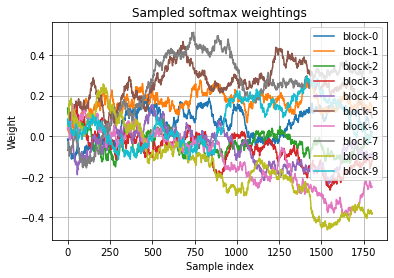

In [19]:
classifier.plot_sample_history()

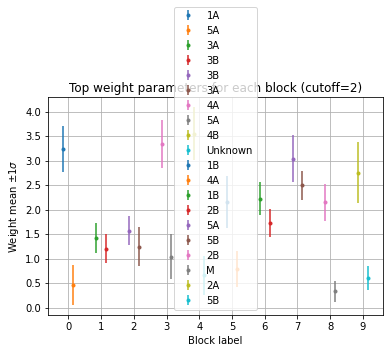

In [21]:
names = list(graph.get_feature_names())
classifier.plot_block_principal_dims(names, cutoff=2, legend=True)

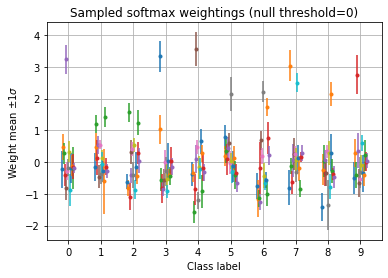

In [22]:
names = list(graph.get_feature_names())
classifier.plot_sampled_weights(names, std_dev_multiplier=1, null_space=0, legend=False)